In [3]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
# Define the path to the saved model and the base directory for the data
model_path = 'best_transfer_learning_model.h5'
base_dir = 'images'
seed = 69

In [5]:
# Load the trained model
model = load_model(model_path)

In [6]:
# Define image size and batch size
img_size = (150, 150)
batch_size = 32

# Create an ImageDataGenerator for loading and preprocessing the images
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Create a data generator for the test data
test_generator = datagen.flow_from_directory(
    base_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',  # Using validation subset as test data
    seed=seed,
    shuffle=False  # To ensure the order of images
)

Found 4725 images belonging to 10 classes.


In [7]:
# Make predictions
predictions = model.predict(test_generator, steps=test_generator.samples // batch_size + 1)
predicted_classes = np.argmax(predictions, axis=1)

148/148 ━━━━━━━━━━━━━━━━━━━━ 203s 1s/step


In [8]:
# Retrieve class labels from the generator
class_indices = test_generator.class_indices
labels = {v: k for k, v in class_indices.items()}
predicted_labels = [labels[k] for k in predicted_classes]

# Get the true labels
y_true = test_generator.classes

In [17]:
# Print classification report
print('Classification Report')
print(classification_report(y_true, predicted_classes, target_names=labels.values()))


Classification Report
              precision    recall  f1-score   support

     battery       0.87      0.86      0.86       189
  biological       0.91      0.82      0.86       197
   cardboard       0.74      0.87      0.80       468
     clothes       0.90      0.97      0.93      1065
       glass       0.79      0.83      0.81       819
       metal       0.83      0.68      0.74       373
       paper       0.86      0.62      0.72       545
     plastic       0.68      0.75      0.71       508
       shoes       0.87      0.91      0.89       395
       trash       0.74      0.57      0.64       166

    accuracy                           0.82      4725
   macro avg       0.82      0.79      0.80      4725
weighted avg       0.82      0.82      0.82      4725



In [14]:
# Function to display images with predictions
def display_images_with_predictions(image_paths, predictions, predicted_classes, class_labels):
    num_images = min(len(image_paths), 16)  # Ensure no more than 16 images are displayed
    num_cols = 4
    num_rows = int(np.ceil(num_images / num_cols))

    plt.figure(figsize=(12, 12))
    for i, (image_path, pred, pred_class) in enumerate(zip(image_paths[:num_images], predictions[:num_images], predicted_classes[:num_images])):
        img = load_img(image_path, target_size=img_size)
        plt.subplot(num_rows, num_cols, i + 1)
        plt.imshow(img)
        confidence = np.max(pred) * 100
        plt.title(f"{class_labels[pred_class]}\nConfidence: {confidence:.2f}%")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

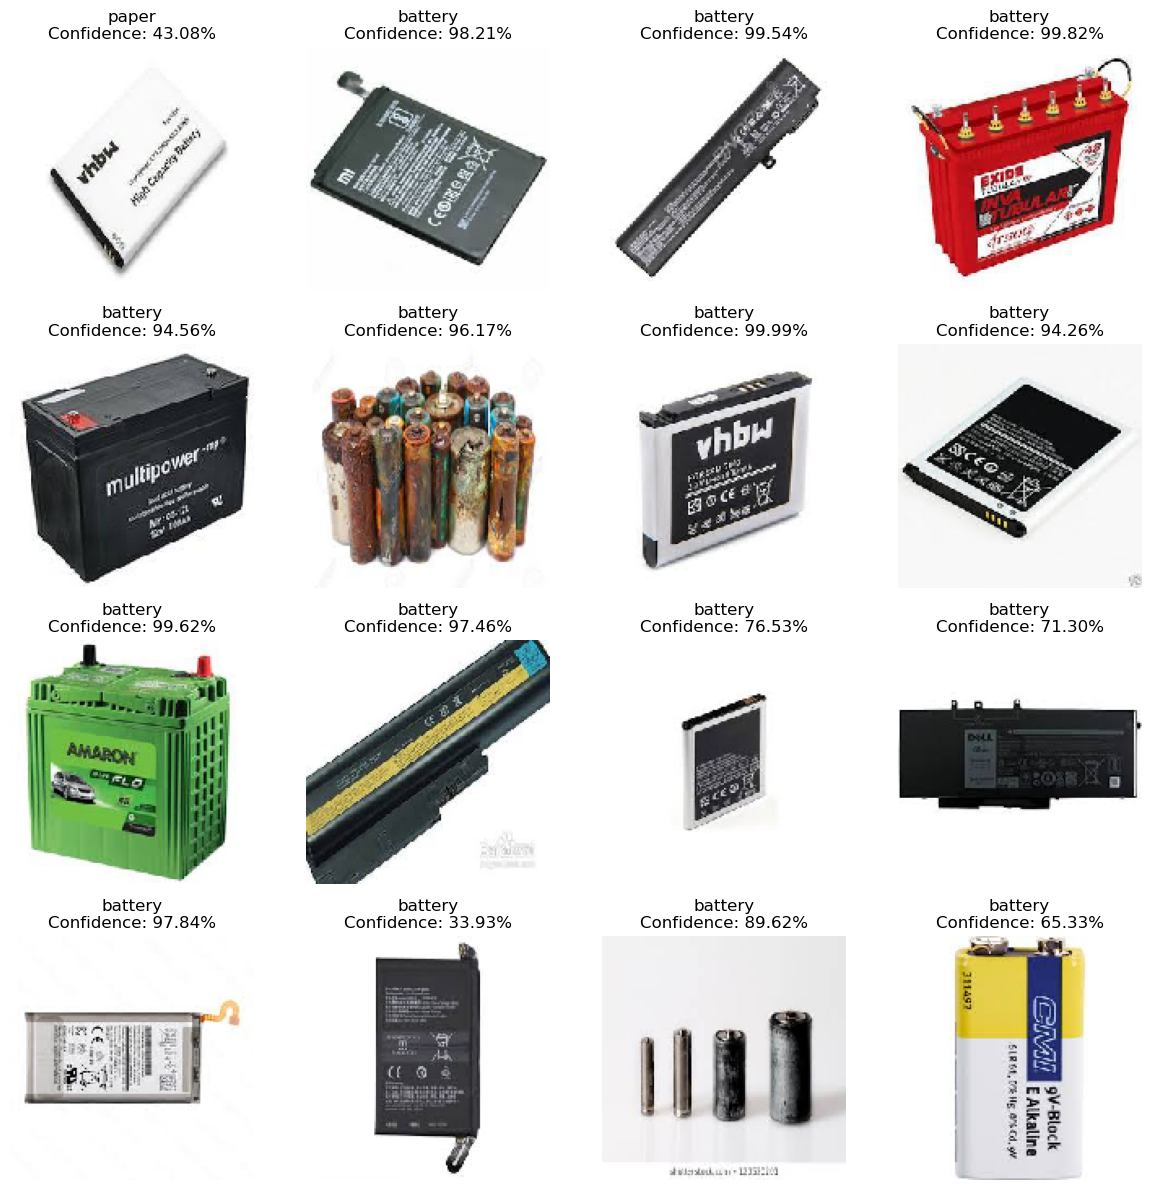

In [16]:

# Display images with predictions
image_paths = [test_generator.filepaths[i] for i in range(len(test_generator.filepaths))]
display_images_with_predictions(image_paths, predictions, predicted_classes, labels)